In [ ]:
import os
import glob
import fnmatch
import pandas as pd
import numpy as np
import librosa #To deal with Audio files
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import tensorflow as tf

In [2]:
data_path = "./sounds_test_train/train"
print(os.listdir(data_path))

['Bus', 'Car (C Class – 4K)', 'Crossover', 'Jeep', 'Minibus', 'Pickup', 'Sports Car', 'Truck']


In [3]:
train_data      = data_path 
unlabel_data        = "./sounds_test_train/test/Unlebel/"

Bus_data     = train_data + '/Bus/'
CarClass4K_data     = train_data + '/Car (C Class – 4K)/'
Crossover_data = train_data + '/Crossover/'
Jeep_data   = train_data + '/Jeep/'
Minibus_data   = train_data + "/Minibus/"
Pickup_data   = train_data + "/Pickup/"
SportsCar_data   = train_data + "/Sports Car/"
Truck_data   = train_data + "/Truck/"

In [4]:
print("Bus files:", len(os.listdir(Bus_data))) 
print("Car (C Class – 4K) files:",len(os.listdir(CarClass4K_data))) 
print("Crossover files", len(os.listdir(Crossover_data))) 
print("Jeep files:",len(os.listdir(Jeep_data)))
print("Minibus files:",len(os.listdir(Minibus_data))) 
print("Pickup files:",len(os.listdir(Pickup_data))) 
print("SportsCar files:",len(os.listdir(SportsCar_data))) 
print("Truck files:",len(os.listdir(Truck_data))) 

print('TOTAL TRAIN SOUNDS:', len(os.listdir(Bus_data)) 
                            + len(os.listdir(CarClass4K_data))
                            + len(os.listdir(Crossover_data))
                            + len(os.listdir(Minibus_data))
                            + len(os.listdir(Jeep_data))
                            + len(os.listdir(Pickup_data))
                            + len(os.listdir(SportsCar_data))
                            + len(os.listdir(Truck_data)))

Bus files: 450
Car (C Class – 4K) files: 350
Crossover files 400
Jeep files: 200
Minibus files: 200
Pickup files: 280
SportsCar files: 400
Truck files: 500
TOTAL TRAIN SOUNDS: 2780


In [5]:
print("Test sounds: ", len(os.listdir(unlabel_data)))

Test sounds:  2800


EDA and Visualization

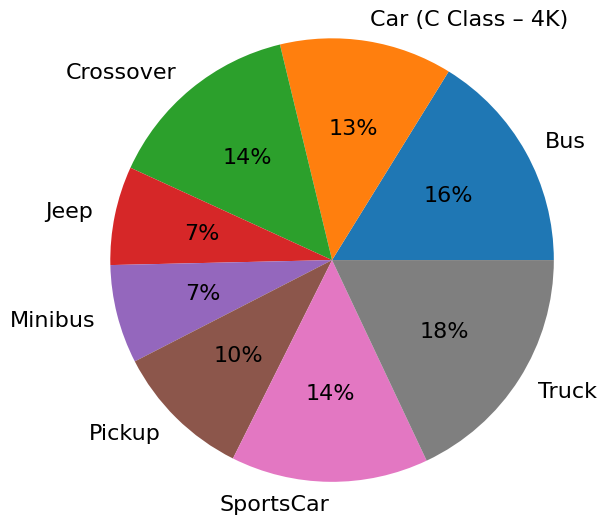

In [6]:
x = np.array([len(os.listdir(Bus_data)),
            len(os.listdir(CarClass4K_data)),
            len(os.listdir(Crossover_data)),
            len(os.listdir(Minibus_data)),
            len(os.listdir(Jeep_data)),
            len(os.listdir(Pickup_data)),
            len(os.listdir(SportsCar_data)),
            len(os.listdir(Truck_data))])
labels = ['Bus', 'Car (C Class – 4K)', 'Crossover', 'Jeep', 'Minibus', 'Pickup', 'SportsCar', 'Truck',]
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, textprops={'fontsize': 16})
plt.show()

Loading Data

In [7]:
def load_file_data(folder, file_names, duration=10, sr=22050):
    input_length = sr * duration
    data = []
    for file_name in file_names:
        mfccs = None  # Assign a default value
        try:
            sound_file = folder + file_name
            print("load file ", sound_file)
            X, sr = librosa.load(sound_file, sr=sr, duration=duration)
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if round(dur) < duration:
                print("fixing audio length:", file_name)
                X = librosa.util.fix_length(X, size=input_length)
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=25).T, axis=0)
        except Exception as e:
            print("Error encountered while parsing file:", file_name)
        feature = np.array(mfccs).reshape([-1, 1])
        data.append(feature)
        print(feature)
    return data


Preprocessing :

Encoding

In [8]:
# simple encoding of categories, convert to only 3 types:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Map label text to integer
CLASSES = labels
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'Bus': 0, 'Car (C Class – 4K)': 1, 'Crossover': 2, 'Jeep': 3, 'Minibus': 4, 'Pickup': 5, 'SportsCar': 6, 'Truck': 7}
 
{0: 'Bus', 1: 'Car (C Class – 4K)', 2: 'Crossover', 3: 'Jeep', 4: 'Minibus', 5: 'Pickup', 6: 'SportsCar', 7: 'Truck'}


In [9]:
# 22 KHz
SAMPLE_RATE = 22050
# seconds
MAX_SOUND_CLIP_DURATION=10

Bus_files = fnmatch.filter(os.listdir(Bus_data), '1*.wav')
Bus_sounds = load_file_data (folder=Bus_data, file_names = Bus_files, duration=MAX_SOUND_CLIP_DURATION)
Bus_labels = [0 for items in Bus_files]

Minibus_files = fnmatch.filter(os.listdir(Minibus_data), '2*.wav')
Minibus_sounds = load_file_data (folder=Minibus_data, file_names = Minibus_files, duration=MAX_SOUND_CLIP_DURATION)
Minibus_labels = [3 for items in Minibus_files]

Pickup_files = fnmatch.filter(os.listdir(Pickup_data), '3*.wav')
Pickup_sounds = load_file_data (folder=Pickup_data, file_names = Pickup_files, duration=MAX_SOUND_CLIP_DURATION)
Pickup_labels = [5 for items in Pickup_files]

SportsCar_files = fnmatch.filter(os.listdir(SportsCar_data), '4*.wav')
SportsCar_sounds = load_file_data (folder=SportsCar_data, file_names = SportsCar_files, duration=MAX_SOUND_CLIP_DURATION)
SportsCar_labels = [6 for items in SportsCar_files]

Jeep_files = fnmatch.filter(os.listdir(Jeep_data), '5*.wav')
Jeep_sounds = load_file_data (folder=Jeep_data, file_names = Jeep_files, duration=MAX_SOUND_CLIP_DURATION)
Jeep_labels = [4 for items in Jeep_files]

Truck_files = fnmatch.filter(os.listdir(Truck_data), '6*.wav')
Truck_sounds = load_file_data (folder=Truck_data, file_names = Truck_files, duration=MAX_SOUND_CLIP_DURATION)
Truck_labels = [7 for items in Truck_files]

Crossover_files = fnmatch.filter(os.listdir(Crossover_data), '7*.wav')
Crossover_sounds = load_file_data (folder=Crossover_data, file_names = Crossover_files, duration=MAX_SOUND_CLIP_DURATION)
Crossover_labels = [2 for items in Crossover_files]

CarClass4K_files = fnmatch.filter(os.listdir(CarClass4K_data), '8*.wav')
CarClass4K_sounds = load_file_data (folder=CarClass4K_data, file_names = CarClass4K_files, duration=MAX_SOUND_CLIP_DURATION)
CarClass4K_labels = [1 for items in CarClass4K_files]

print ("Loading Done")

load file  ./sounds_test_train/train/Bus/1 (401).wav
fixing audio length: 1 (401).wav
[[-5.2328137e+02]
 [ 3.9478565e+01]
 [ 1.7220846e+00]
 [ 3.1300235e+00]
 [ 2.5169442e+00]
 [ 2.5117040e+00]
 [ 5.1180453e+00]
 [ 3.2839673e+00]
 [ 1.0263300e+00]
 [ 6.5046734e-01]
 [ 1.5321691e+00]
 [ 1.5627986e+00]
 [ 1.5527080e+00]
 [ 1.8884742e+00]
 [ 1.3884933e+00]
 [ 1.1148974e+00]
 [ 1.1886519e+00]
 [ 1.2812121e+00]
 [ 1.6644063e+00]
 [ 2.2940328e+00]
 [ 2.0140989e+00]
 [ 1.3842344e+00]
 [ 8.0966628e-01]
 [ 3.4943718e-01]
 [-2.1548966e-02]]
load file  ./sounds_test_train/train/Bus/1 (402).wav
fixing audio length: 1 (402).wav
[[-5.1345709e+02]
 [ 3.8508820e+01]
 [-5.5624604e-01]
 [ 3.3561859e+00]
 [ 2.4875348e+00]
 [ 1.8474045e+00]
 [ 5.7390380e+00]
 [ 4.3864756e+00]
 [ 1.1848370e+00]
 [ 1.7170837e+00]
 [ 2.9655383e+00]
 [ 1.7008786e+00]
 [ 1.1727631e+00]
 [ 1.9012908e+00]
 [ 1.3979272e+00]
 [ 6.5114605e-01]
 [ 1.2161173e+00]
 [ 1.5411474e+00]
 [ 1.2904730e+00]
 [ 1.7331699e+00]
 [ 1.3870456e+00]

In [10]:
# unlabel_datala files
unlabelledtest_files = fnmatch.filter(os.listdir(unlabel_data), '*.wav')
unlabelledtest_sounds = load_file_data(folder=unlabel_data,file_names=unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
unlabelledtest_labels = [0 for items in unlabelledtest_sounds]

print ("Loading of unlabel data done")

load file  ./sounds_test_train/test/Unlebel/1 (1).wav
fixing audio length: 1 (1).wav
[[-4.3352097e+02]
 [ 6.2901276e+01]
 [ 1.1267127e+00]
 [ 1.0127960e+01]
 [ 6.6000137e+00]
 [ 4.9419060e+00]
 [ 5.2829924e+00]
 [ 3.6602883e+00]
 [ 2.2255690e+00]
 [ 2.8719208e+00]
 [ 2.2030420e+00]
 [ 1.4729123e+00]
 [ 1.7845111e+00]
 [ 1.9764156e+00]
 [ 2.0701277e+00]
 [ 1.6163764e+00]
 [ 8.3664066e-01]
 [ 2.6953137e-01]
 [ 4.0456253e-01]
 [ 1.1133021e+00]
 [ 9.4878584e-01]
 [ 9.5954770e-01]
 [ 8.7311161e-01]
 [ 7.1448803e-01]
 [ 5.6935138e-01]]
load file  ./sounds_test_train/test/Unlebel/1 (10).wav
fixing audio length: 1 (10).wav
[[-4.1788483e+02]
 [ 5.8937935e+01]
 [-6.0933328e-01]
 [ 1.2715826e+01]
 [ 5.4557085e+00]
 [ 4.9398670e+00]
 [ 4.3766479e+00]
 [ 3.9549811e+00]
 [ 5.7162488e-01]
 [ 2.9301305e+00]
 [ 2.8186874e+00]
 [ 1.3281767e+00]
 [ 2.7205756e+00]
 [ 1.3310300e+00]
 [ 1.4569942e+00]
 [ 2.2470977e+00]
 [-7.7862009e-02]
 [-1.4696865e-01]
 [ 9.9275905e-01]
 [ 1.3948003e+00]
 [ 3.2513380e-02]

concatenation

In [15]:
# Combine set-a and set-b for training data
x_data = np.concatenate((Bus_sounds, CarClass4K_sounds, Crossover_sounds, Jeep_sounds, Minibus_sounds, Pickup_sounds, SportsCar_sounds, Truck_sounds))
y_data = np.concatenate((Bus_labels, CarClass4K_labels, Crossover_labels, Jeep_labels, Minibus_labels, Pickup_labels, SportsCar_labels, Truck_labels))

# Concatenate unlabelled test data
test_x = np.concatenate(unlabelledtest_sounds)
test_y = np.array(unlabelledtest_labels)  # Convert to NumPy array
print(test_x)
print("Combined training data record:", len(y_data), len(test_y))


[[-4.3352097e+02]
 [ 6.2901276e+01]
 [ 1.1267127e+00]
 ...
 [ 1.8307392e-01]
 [ 1.9925644e-01]
 [-1.0100499e-01]]
Combined training data record: 2780 2800


In [12]:
x_data.shape

(2780, 25, 1)

train_test_validation split

In [13]:
# shuffle - whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.

# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=42, shuffle=True)

# One-Hot encoding for classes
y_train = np.array(tf.keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(tf.keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(tf.keras.utils.to_categorical(y_val, len(CLASSES)))
test_y=np.array(tf.keras.utils.to_categorical(test_y, len(CLASSES)))

Correct imbalnced data using class weight

In [14]:
TRAIN_IMG_COUNT = 2780
COUNT_0 = 450  
COUNT_1 = 200 
COUNT_2 = 280
COUNT_3 = 400 
COUNT_4 = 200 
COUNT_5 = 500 
COUNT_6 = 350 
COUNT_7 = 400  
weight_for_0 = TRAIN_IMG_COUNT / (8 * COUNT_0)
weight_for_1 = TRAIN_IMG_COUNT / (8 * COUNT_1)
weight_for_2 = TRAIN_IMG_COUNT / (8 * COUNT_2)
weight_for_3 = TRAIN_IMG_COUNT / (8 * COUNT_3)
weight_for_4 = TRAIN_IMG_COUNT / (8 * COUNT_4)
weight_for_5 = TRAIN_IMG_COUNT / (8 * COUNT_5)
weight_for_6 = TRAIN_IMG_COUNT / (8 * COUNT_6)
weight_for_7 = TRAIN_IMG_COUNT / (8 * COUNT_7)
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3, 4: weight_for_4, 5: weight_for_5, 6: weight_for_6, 7: weight_for_7}
class_weight

{0: 0.7722222222222223,
 1: 1.7375,
 2: 1.2410714285714286,
 3: 0.86875,
 4: 1.7375,
 5: 0.695,
 6: 0.9928571428571429,
 7: 0.86875}

LSTM Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, Bidirectional, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint,TensorBoard,ProgbarLogger
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [16]:
model = Sequential()

model.add(Bidirectional(LSTM(128, dropout=0.05, recurrent_dropout=0.20, return_sequences=True), input_shape = (25,1)))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Flatten())

model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 25, 256)          133120    
 l)                                                              
                                                                 
 dense (Dense)               (None, 25, 128)           32896     
                                                                 
 dropout (Dropout)           (None, 25, 128)           0         
                                                                 
 dense_1 (Dense)             (None, 25, 128)           16512     
                                                                 
 dense_2 (Dense)             (None, 25, 64)            8256      
                                                                 
 dense_3 (Dense)             (None, 25, 64)            4160      
                                                        

In [17]:
weight_saver = ModelCheckpoint('set_a_weights.h5', monitor='val_loss', 
                            save_best_only=True, save_weights_only=True)
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8**x)

In [18]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [19]:
history=model.fit(x_train, y_train, 
                batch_size=3, 
                epochs=15,
                class_weight=class_weight,
                callbacks=[weight_saver, annealer],
                validation_data=(x_val, y_val)) 

Epoch 1/15
593/593 [==============================] - 113s 182ms/step - loss: 0.9479 - acc: 0.6779 - val_loss: 0.3623 - val_acc: 0.8539 - lr: 0.0010
Epoch 2/15
593/593 [==============================] - 109s 183ms/step - loss: 0.2918 - acc: 0.9106 - val_loss: 0.1372 - val_acc: 0.9551 - lr: 8.0000e-04
Epoch 3/15
593/593 [==============================] - 120s 202ms/step - loss: 0.1759 - acc: 0.9472 - val_loss: 0.0790 - val_acc: 0.9730 - lr: 6.4000e-04
Epoch 4/15
593/593 [==============================] - 112s 188ms/step - loss: 0.1135 - acc: 0.9663 - val_loss: 0.0799 - val_acc: 0.9775 - lr: 5.1200e-04
Epoch 5/15
593/593 [==============================] - 114s 192ms/step - loss: 0.1116 - acc: 0.9668 - val_loss: 0.0726 - val_acc: 0.9753 - lr: 4.0960e-04
Epoch 6/15
593/593 [==============================] - 103s 173ms/step - loss: 0.0933 - acc: 0.9786 - val_loss: 0.0633 - val_acc: 0.9820 - lr: 3.2768e-04
Epoch 7/15
593/593 [==============================] - 97s 163ms/step - loss: 0.0680 - 

<Axes: >

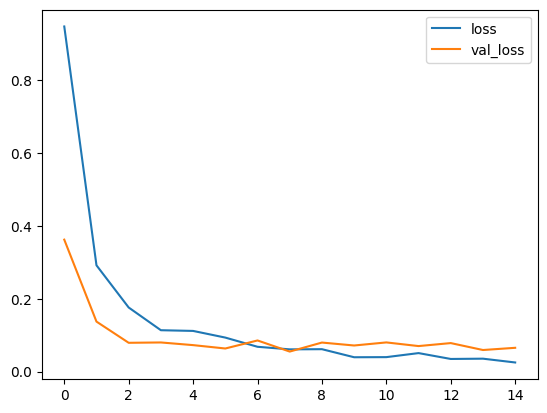

In [20]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

<Axes: >

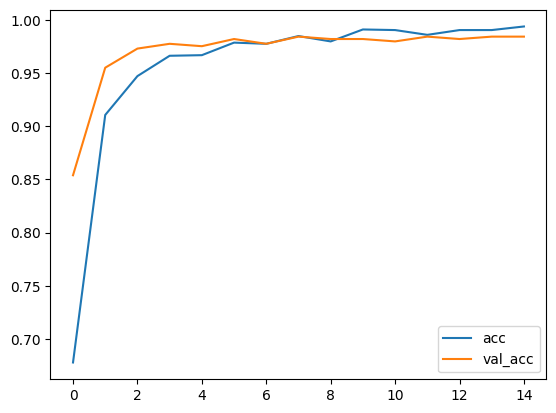

In [21]:
losses[['acc','val_acc']].plot()

In [22]:
model.save("./models/LSTM.h5")

Prediction

In [23]:
from keras.models import load_model
# Declare constants
model =  load_model("./models/LSTM.h5")

In [24]:
# make a prediction
y_pred = model.predict(x_test, batch_size=5)
#check scores
scores = model.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

18/18 [==============================] - 1s 44ms/step - loss: 0.0308 - acc: 0.9874
Model evaluation accuracy:  99 %


In [25]:
# prediction class 
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[1]])

18/18 [==============================] - 1s 40ms/step
prediction test return : 2 - Crossover


In [26]:
def preprocessing (file_path, duration=10, sr=22050):
    input_length=sr*duration
    process_file=[]
    X, sr = librosa.load(file_path, sr=sr, duration=duration) 
    dur = librosa.get_duration(y=X, sr=sr)
    # pad audio file same duration
    if (round(dur) < duration):
        y = librosa.util.fix_length(X, input_length)                
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40, n_fft=512,hop_length=2048).T,axis=0)
    feature = np.array(mfccs).reshape([-1,1])
    process_file.append(feature)
    process_file_array = np.asarray(process_file)
    return process_file_array

In [27]:
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)

18/18 [==============================] - 1s 39ms/step


In [28]:
target_names = labels
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))

                    precision    recall  f1-score   support

               Bus       1.00      1.00      1.00        93
Car (C Class – 4K)       0.99      0.99      0.99        69
         Crossover       0.94      0.99      0.96        76
              Jeep       1.00      0.98      0.99        43
           Minibus       0.97      0.95      0.96        38
            Pickup       1.00      0.97      0.98        58
         SportsCar       1.00      1.00      1.00        82
             Truck       1.00      1.00      1.00        97

          accuracy                           0.99       556
         macro avg       0.99      0.98      0.98       556
      weighted avg       0.99      0.99      0.99       556

